In [1]:
import cv2
import numpy as np
from keras.models import load_model
from sklearn.metrics.pairwise import cosine_similarity
import os
from glob import glob

# Load the pre-trained model and compiled it
model = load_model('model.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the features extracted for all book covers
all_features = np.load('book_cover_features.npy')

# Path to the folder with downloaded images
download_folder = 'downloaded_images/'
image_paths = glob(os.path.join(download_folder, '*.jpg'))

def recommend_book(book_name):
    uploaded_image_path = os.path.join(download_folder, f"{book_name}.jpg")
    if not os.path.exists(uploaded_image_path):
        raise FileNotFoundError(f"The specified image path does not exist: {uploaded_image_path}")
    user_image = cv2.imread(uploaded_image_path)
    if user_image is None:
        raise ValueError(f"Failed to load image from path: {uploaded_image_path}")
    user_image = cv2.resize(user_image, (224, 224))
    user_image = user_image / 255.0
    user_image = np.expand_dims(user_image, axis=0)
    user_features = model.predict(user_image)
    similarity_scores = cosine_similarity(user_features, all_features)
    similarity_scores = similarity_scores.flatten()
    top_n = 5
    similar_books_indices = similarity_scores.argsort()[-top_n-1:-1][::-1]
    print("Similarity scores: ", similarity_scores)
    print(f"Similar books indices: ", similar_books_indices)
    book_suggestions = []
    for idx in similar_books_indices:
        book_title = os.path.basename(image_paths[idx]).replace('.jpg', '')
        book_suggestions.append(book_title)

recommend_book('All the King\'s Men')

2024-12-08 22:03:31.650542: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-08 22:03:31.744365: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-08 22:03:33.962915: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-08 22:03:34.535934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733675615.499783   13748 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733675615.66

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Similarity scores:  [0.9344168  0.91722655 0.9686083  ... 0.93558586 0.9284469  1.0000001 ]
Similar books indices:  [26046 26076     3    10    12]


IndexError: list index out of range

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
                                              Input Book                                  Top 5 Similarity Scores         Top 5 Similar Books Indices
D:/ml/downloaded_images/15 Minutes of Peace With God.jpg  [1.0000001, 1.0000001, 1.0000001, 1.0000001, 1.0000001] [13599, 21847, 13612, 13610, 13609]
                      D:/ml/downloaded_images/Zombie.jpg [0.9842925, 0.98405886, 0.9840375, 0.9840091, 0.9838261]    [10193, 20832, 598, 3456, 13215]
              D:/ml/downloaded_images/You're the One.jpg   [0.9859319, 0.98555875, 0.9854075, 0.98497, 0.9845528] [12016, 11339, 18828, 17334, 25546]
               D:/ml/downloaded_images/Word of Honor.jpg  [0.977609, 0.97467303, 0.974548, 0.9744715, 0.97440356] [22984, 19420, 21582, 19199, 21860]
                 D:/ml/downloaded_images/Witch Blood.jp

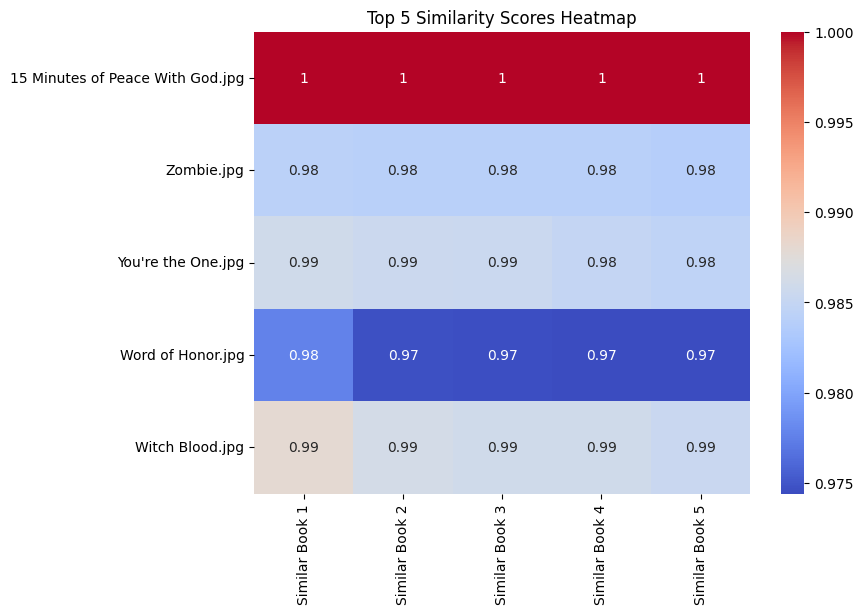

Query book cover:


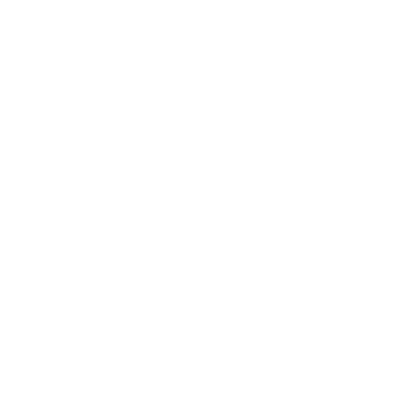

Recommended similar book covers:


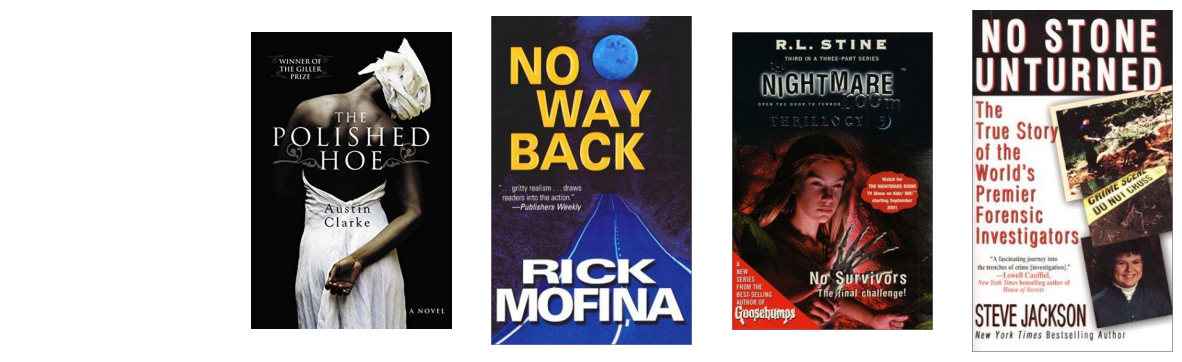

In [ ]:
# import matplotlib.pyplot as plt
# import cv2
# import numpy as np
# from keras.models import load_model
# from sklearn.metrics.pairwise import cosine_similarity
# import os
# import pandas as pd
# from glob import glob
# import seaborn as sns

# def display_images(indices, image_paths):
#     plt.figure(figsize=(15, 5))
#     for i, idx in enumerate(indices):
#         img_path = idx if isinstance(idx, str) else image_paths[idx]
#         img = cv2.imread(img_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         plt.subplot(1, len(indices), i + 1)
#         plt.imshow(img)
#         plt.axis('off')
#     plt.show()

# # Load the saved model
# model = load_model('model.h5')

# # Compile the model manually if needed
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Load 'all_features'
# all_features = np.load('book_cover_features.npy')

# # Ensure 'image_paths' is defined
# download_folder = 'downloaded_images/'
# image_paths = glob(os.path.join(download_folder, '*.jpg'))

# # Function to get similarity scores and indices
# def get_similarity_scores_and_indices(uploaded_image_path):
#     if not os.path.exists(uploaded_image_path):
#         raise FileNotFoundError(f"The specified image path does not exist: {uploaded_image_path}")

#     user_image = cv2.imread(uploaded_image_path)
#     if user_image is None:
#         raise ValueError(f"Failed to load image from path: {uploaded_image_path}")

#     user_image = cv2.resize(user_image, (224, 224))
#     user_image = user_image / 255.0
#     user_image = np.expand_dims(user_image, axis=0)

#     user_features = model.predict(user_image)

#     similarity_scores = cosine_similarity(user_features, all_features)
#     similarity_scores = similarity_scores.flatten()

#     top_n = 10
#     similar_books_indices = similarity_scores.argsort()[-top_n-1:-1][::-1]

#     # Get top 5 similarity scores and their indices
#     top_5_scores = similarity_scores[similar_books_indices][:5]
#     top_5_indices = similar_books_indices[:5]

#     return top_5_scores, top_5_indices

# # List of 5 input book paths
# input_books = [
#     'D:/ml/downloaded_images/15 Minutes of Peace With God.jpg',
#     'D:/ml/downloaded_images/Zombie.jpg',
#     "D:/ml/downloaded_images/You're the One.jpg",
#     'D:/ml/downloaded_images/Word of Honor.jpg',
#     'D:/ml/downloaded_images/Witch Blood.jpg'
# ]

# # DataFrame to store results
# results = pd.DataFrame(columns=['Input Book', 'Top 5 Similarity Scores', 'Top 5 Similar Books Indices'])

# # Get similarity scores and indices for each input book
# for book_path in input_books:
#     top_5_scores, top_5_indices = get_similarity_scores_and_indices(book_path)
#     result = pd.DataFrame({
#         'Input Book': [book_path],
#         'Top 5 Similarity Scores': [top_5_scores],
#         'Top 5 Similar Books Indices': [top_5_indices]
#     })
#     results = pd.concat([results, result], ignore_index=True)

# # Print results in tabular format
# pd.set_option('display.max_colwidth', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# print(results.to_string(index=False))

# # Create a DataFrame for the heatmap
# heatmap_data = pd.DataFrame(
#     data=[scores for scores in results['Top 5 Similarity Scores']],
#     index=[os.path.basename(path) for path in results['Input Book']],
#     columns=[f"Similar Book {i+1}" for i in range(5)]
# )

# # Plot heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
# plt.title('Top 5 Similarity Scores Heatmap')
# plt.show()

# # Optionally, display images for the first input book
# print("Query book cover:")
# display_images([input_books[0]], [input_books[0]])

# print("Recommended similar book covers:")
# display_images(results.iloc[0]['Top 5 Similar Books Indices'], image_paths)



import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import load_model
from sklearn.metrics.pairwise import cosine_similarity
import os
import pandas as pd
from glob import glob
import seaborn as sns

def display_images(indices, image_paths):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices):
        img_path = idx if isinstance(idx, str) else image_paths[idx]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Load the saved model
model = load_model('model.h5')

# Compile the model manually if needed
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Load 'all_features'
all_features = np.load('book_cover_features.npy')

# Ensure 'image_paths' is defined
download_folder = 'downloaded_images/'
image_paths = glob(os.path.join(download_folder, '*.jpg'))

# Function to get similarity scores and indices
def get_similarity_scores_and_indices(uploaded_image_path):
    if not os.path.exists(uploaded_image_path):
        raise FileNotFoundError(f"The specified image path does not exist: {uploaded_image_path}")

    user_image = cv2.imread(uploaded_image_path)
    if user_image is None:
        raise ValueError(f"Failed to load image from path: {uploaded_image_path}")

    user_image = cv2.resize(user_image, (224, 224))
    user_image = user_image / 255.0
    user_image = np.expand_dims(user_image, axis=0)

    user_features = model.predict(user_image)

    similarity_scores = cosine_similarity(user_features, all_features)
    similarity_scores = similarity_scores.flatten()

    top_n = 10
    similar_books_indices = similarity_scores.argsort()[-top_n-1:-1][::-1]

    # Get top 5 similarity scores and their indices
    top_5_scores = similarity_scores[similar_books_indices][:5]
    top_5_indices = similar_books_indices[:5]

    return top_5_scores, top_5_indices

# List of 5 input book paths
input_books = [
    '/home/kushal/Desktop/Code/ml-projects/Project/downloaded_images/15 Minutes of Peace With God.jpg',
    '/home/kushal/Desktop/Code/ml-projects/Project/downloaded_images/Zombie.jpg',
    "/home/kushal/Desktop/Code/ml-projects/Project/downloaded_images/You're the One.jpg",
    '/home/kushal/Desktop/Code/ml-projects/Project/downloaded_images/Word of Honor.jpg',
    '/home/kushal/Desktop/Code/ml-projects/Project/downloaded_images/Witch Blood.jpg'
]

# DataFrame to store results
results = pd.DataFrame(columns=['Input Book', 'Top 5 Similarity Scores', 'Top 5 Similar Books Indices'])

# Get similarity scores and indices for each input book
for book_path in input_books:
    top_5_scores, top_5_indices = get_similarity_scores_and_indices(book_path)
    result = pd.DataFrame({
        'Input Book': [book_path],
        'Top 5 Similarity Scores': [top_5_scores],
        'Top 5 Similar Books Indices': [top_5_indices]
    })
    results = pd.concat([results, result], ignore_index=True)

# Print results in tabular format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print(results.to_string(index=False))

# Create a DataFrame for the heatmap of similarity scores
heatmap_data = pd.DataFrame(
    data=[scores for scores in results['Top 5 Similarity Scores']],
    index=[os.path.basename(path) for path in results['Input Book']],
    columns=[f"Similar Book {i+1}" for i in range(5)]
)

# Plot heatmap for similarity scores
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True)
plt.title('Top 5 Similarity Scores Heatmap')
plt.show()

# Optionally, display images for the first input book
print("Query book cover:")
display_images([input_books[0]], [input_books[0]])

print("Recommended similar book covers:")
display_images(results.iloc[0]['Top 5 Similar Books Indices'], image_paths)


